# Requirements

This exercise requires that you have mplstereonet installed

In [1]:
import numpy as np
import mplstereonet as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *
from plots import *

%matplotlib inline

# Define parameters and generate our data

In [2]:
kynematic_window = 30 #degrees
slope_dipdir, slope_dip = 220,60
slope_height = 16

Note: If you have your own data, just match the column names and read as csv/xlsx file and try it

If not, use some example of generated data

In [3]:
mu_dir, sigma_dir = 240,7
mu_dip,sigma_dip = 40,5
data1 = generate_structures(mu_dir, sigma_dir, mu_dip,sigma_dip, litho=['Quartzite', 'Itabirite'],size=150)
data1['structure'] = 'Sb'

mu_dir, sigma_dir = 220,7
mu_dip,sigma_dip = 60,5
datax = generate_structures(mu_dir, sigma_dir, mu_dip,sigma_dip, litho=['Schist'],size=50)
datax['structure'] = 'Sn'


mu_dir, sigma_dir = 180,5
mu_dip,sigma_dip = 55,5
data2 = generate_structures(mu_dir, sigma_dir, mu_dip,sigma_dip, litho=['Quartzite', 'Itabirite'],size=50)
data2['structure'] = 'Fr1'

mu_dir, sigma_dir = 300,10
mu_dip,sigma_dip = 80,2
data3 = generate_structures(mu_dir, sigma_dir, mu_dip,sigma_dip, litho=['Quartzite', 'Itabirite'],size=50)
data3['structure'] = 'Fr2'

df = pd.concat([data1,datax,data2,data3],ignore_index=True)

friction =  {'Itabirite': 37, 'Slate':28, 'Schist':30,'Quartzite':35}
df['friction'] = df['litho'].map(friction)

#And must define a few other parameters that characterize the structures

persistency =  {'Sb': 20, 'Sn': 20, 'Fr1':8 ,'Fr2':3}
df['persistency'] = df['structure'].map(persistency)

persistency =  {'Sb': 20, 'Sn': 20, 'Fr1':8 ,'Fr2':3}
df['persistency'] = df['structure'].map(persistency)

spacing =  {'Sb': 1, 'Sn': 0.1, 'Fr1':5 ,'Fr2':8}
df['spacing'] = df['structure'].map(spacing)
df

,dipdir,dip,litho,structure,friction,persistency,spacing
0,241,40,Quartzite,Sb,35,20,1.0
1,237,42,Itabirite,Sb,37,20,1.0
2,247,43,Quartzite,Sb,35,20,1.0
3,236,33,Itabirite,Sb,37,20,1.0
4,234,46,Quartzite,Sb,35,20,1.0
...,...,...,...,...,...,...,...
295,319,73,Itabirite,Fr2,37,3,8.0
296,269,72,Quartzite,Fr2,35,3,8.0
297,294,74,Itabirite,Fr2,37,3,8.0
298,289,84,Quartzite,Fr2,35,3,8.0


# Check for potential planar ruptures

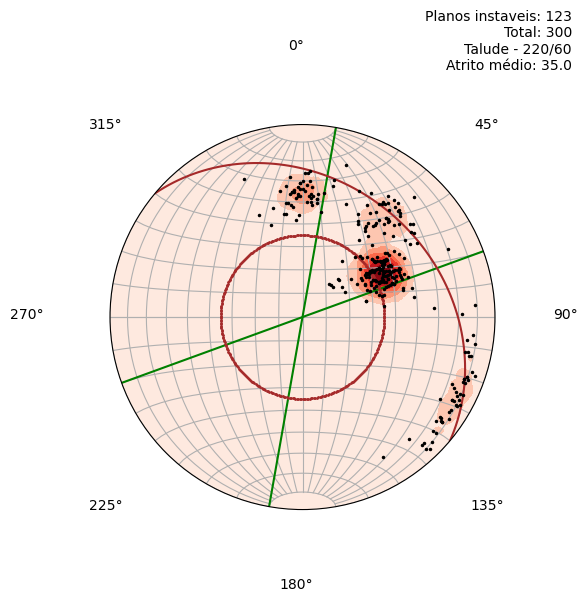

In [4]:
df['paralellism'] = df.apply(lambda x: paralellism(x['dipdir'], slope_dipdir,kynematic_window=kynematic_window), axis=1)
df['dip_paralellism'] = df.apply(lambda x: dip_paralellism(x['dip'], slope_dip,x['friction']), axis=1)
df['planar_rupture'] = df.apply(lambda x: planar_rupture(x['paralellism'], x['dip_paralellism']), axis=1)

planar_stereogram(df,slope_dipdir, slope_dip )

### Lets Calculate the apparent angle of the structure on our slope plan

 * If you are having trouble understand apparent dip, do not miss the [Visible Geology Website](https://app.visiblegeology.com/apparentDip.html)

Or you should try to draw it, it really helps understanding.

In [5]:
def apparent_dip(slope_dipdir,structure_dipdir, structure_dip):
    dip = np.radians(90 - structure_dip)
    a = dipdir_to_xy(structure_dipdir)
    b = dipdir_to_xy(slope_dipdir + 90)
    angle_between_planes = (np.arccos(np.dot(a,b)))
    if angle_between_planes > (np.pi/2):
        angle_between_planes = np.pi - angle_between_planes
    apparent_angle  = np.arctan(np.sin((angle_between_planes))/(np.tan(dip)))
    apparent_angle = np.round(np.degrees(apparent_angle), decimals=1)

    return apparent_angle 

In [6]:
df['apparent_dip'] = df.apply(lambda x: apparent_dip(slope_dipdir, x['dipdir'], x['dip']), axis=1)
df['persistency_height'] = np.sin(np.radians(df['apparent_dip'])) * df['persistency']

From now on, we'll only use the structures with potential risk of planar rupture

In [7]:
risk = df.query('planar_rupture == True')
risk

,dipdir,dip,litho,structure,friction,persistency,spacing,paralellism,dip_paralellism,planar_rupture,apparent_dip,persistency_height
0,241,40,Quartzite,Sb,35,20,1.0,True,True,True,38.1,12.340718
1,237,42,Itabirite,Sb,37,20,1.0,True,True,True,40.7,13.041968
2,247,43,Quartzite,Sb,35,20,1.0,True,True,True,39.7,12.775356
4,234,46,Quartzite,Sb,35,20,1.0,True,True,True,45.1,14.166797
7,240,51,Itabirite,Sb,37,20,1.0,True,True,True,49.2,15.139901
...,...,...,...,...,...,...,...,...,...,...,...,...
195,224,51,Schist,Sn,30,20,0.1,True,True,True,50.9,15.520928
196,219,45,Schist,Sn,30,20,0.1,True,True,True,45.0,14.142136
197,249,46,Schist,Sn,30,20,0.1,True,True,True,42.2,13.434412
199,190,46,Schist,Sn,30,20,0.1,True,True,True,41.9,13.356651


## Now we start estimating the berm size required to hold a planar rupture

For that we also must define a set of parameters regarding the material characteristics

In [8]:
# m_p_d = 0 #Material pré desmoronado
# n_b = 1 #numero_bancadas
# a_r = 35 #angulo_de_repouso 
# f_e = 1.4 #fator_de_empolamento
# d_o_l_s = 0 #distancia_operacional_entre_lances_simples
# l_m_l_r = 0 #largura_minima_livre_requerida
# l_m_o = 0 #largura_minima_operacional

PCM = 0  # Pre-collapsed material
NB = 1  # Number of benches
AR = 35  # Angle of repose
BF = 1.4  # Bulking factor
ODSS = 0  # Operating distance between simple spans
MRFW = 0  # Minimum required free width
MOW = 0 # Minimum operational width



In [9]:
df.columns

Index(['dipdir', 'dip', 'litho', 'structure', 'friction', 'persistency',
       'spacing', 'paralellism', 'dip_paralellism', 'planar_rupture',
       'apparent_dip', 'persistency_height'],
      dtype='object')

In [10]:
risk['remanecent_height'] = risk.apply(lambda x: (slope_height * NB) - x['persistency_height'] , axis=1)
risk['projection_on_slope'] = risk.apply(lambda x: x['remanecent_height'] /  np.sin(np.radians(slope_dip) ), axis=1)
risk

C:\Users\bruno\AppData\Local\Temp\ipykernel_14492\1504966293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk['remanecent_height'] = risk.apply(lambda x: (slope_height * NB) - x['persistency_height'] , axis=1)
C:\Users\bruno\AppData\Local\Temp\ipykernel_14492\1504966293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk['projection_on_slope'] = risk.apply(lambda x: x['remanecent_height'] /  np.sin(np.radians(slope_dip) ), axis=1)


,dipdir,dip,litho,structure,friction,persistency,spacing,paralellism,dip_paralellism,planar_rupture,apparent_dip,persistency_height,remanecent_height,projection_on_slope
0,241,40,Quartzite,Sb,35,20,1.0,True,True,True,38.1,12.340718,3.659282,4.225375
1,237,42,Itabirite,Sb,37,20,1.0,True,True,True,40.7,13.041968,2.958032,3.415641
2,247,43,Quartzite,Sb,35,20,1.0,True,True,True,39.7,12.775356,3.224644,3.723498
4,234,46,Quartzite,Sb,35,20,1.0,True,True,True,45.1,14.166797,1.833203,2.116801
7,240,51,Itabirite,Sb,37,20,1.0,True,True,True,49.2,15.139901,0.860099,0.993157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,224,51,Schist,Sn,30,20,0.1,True,True,True,50.9,15.520928,0.479072,0.553185
196,219,45,Schist,Sn,30,20,0.1,True,True,True,45.0,14.142136,1.857864,2.145277
197,249,46,Schist,Sn,30,20,0.1,True,True,True,42.2,13.434412,2.565588,2.962486
199,190,46,Schist,Sn,30,20,0.1,True,True,True,41.9,13.356651,2.643349,3.052276


In [11]:
berm_width =  4.5 + (0.2 * slope_height * NB)
berm_width

7.7

In [12]:
risk['backbreak'] = (risk['persistency_height']/(np.tan(np.radians(risk['dip']))))-(risk['persistency_height']/(np.tan(np.radians(slope_dip))))
risk['cutting_area'] = ((np.power(risk['persistency_height'],2)/2)*
        ((1/np.tan(np.radians(risk['dip'])))-
          (1/np.tan(np.radians(slope_dip))))* (1-PCM))

risk['blistered_area'] = risk['cutting_area'] * BF

C:\Users\bruno\AppData\Local\Temp\ipykernel_14492\2338881109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk['backbreak'] = (risk['persistency_height']/(np.tan(np.radians(risk['dip']))))-(risk['persistency_height']/(np.tan(np.radians(slope_dip))))
C:\Users\bruno\AppData\Local\Temp\ipykernel_14492\2338881109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk['cutting_area'] = ((np.power(risk['persistency_height'],2)/2)*
C:\Users\bruno\AppData\Local\Temp\ipykernel_14492\2338881109.py:6: Setting

In [13]:
risk['area_between_slope_and_rupture_projection'] = 0.5*np.power(risk['remanecent_height'],2)*(np.sin(np.radians(180-slope_dip))*
                                                    np.sin(np.radians(slope_dip-
                                                                      risk['dip']))/
                                                    np.sin(np.radians(risk['dip'])))

C:\Users\bruno\AppData\Local\Temp\ipykernel_14492\2194766987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk['area_between_slope_and_rupture_projection'] = 0.5*np.power(risk['remanecent_height'],2)*(np.sin(np.radians(180-slope_dip))*


In [14]:
risk['distance_between_slopefoot_and_rupture_projection'] = ((2*risk['area_between_slope_and_rupture_projection'])/
                      (risk['projection_on_slope']*np.sin(np.radians(180-slope_dip))))

C:\Users\bruno\AppData\Local\Temp\ipykernel_14492\289727640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk['distance_between_slopefoot_and_rupture_projection'] = ((2*risk['area_between_slope_and_rupture_projection'])/


In [15]:

risk['distance_between_projection_rupture_and_broken_material'] =  np.sqrt(np.absolute((2*(risk['blistered_area']-risk['area_between_slope_and_rupture_projection'])*
                    np.sin(np.radians(risk['dip']-AR))/
                      (np.sin(np.radians(180-risk['dip']))*
                      np.sin(np.radians(AR))))))

C:\Users\bruno\AppData\Local\Temp\ipykernel_14492\3353838290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk['distance_between_projection_rupture_and_broken_material'] =  np.sqrt(np.absolute((2*(risk['blistered_area']-risk['area_between_slope_and_rupture_projection'])*


In [16]:
def estimate_containment_width(area_between_slope_and_rupture_projection,blistered_area,distance_between_slopefoot_and_rupture_projection,distance_between_projection_rupture_and_broken_material ,angle_repose,slope_dip):
  if area_between_slope_and_rupture_projection < blistered_area:
    Lr = (distance_between_slopefoot_and_rupture_projection +
          distance_between_projection_rupture_and_broken_material)
  else:
    Lr = np.sqrt(np.absolute((2*blistered_area*sen(slope_dip-angle_repose))/
          (sen(angle_repose)*sen(180-slope_dip))))
  return Lr

risk['required_containment_width'] = risk.apply(lambda x: estimate_containment_width(x['area_between_slope_and_rupture_projection'],x['blistered_area'],x['distance_between_slopefoot_and_rupture_projection'],x['distance_between_projection_rupture_and_broken_material'] , AR, slope_dip), axis=1 )

C:\Users\bruno\AppData\Local\Temp\ipykernel_14492\1167588471.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk['required_containment_width'] = risk.apply(lambda x: estimate_containment_width(x['area_between_slope_and_rupture_projection'],x['blistered_area'],x['distance_between_slopefoot_and_rupture_projection'],x['distance_between_projection_rupture_and_broken_material'] , AR, slope_dip), axis=1 )


In [17]:
def calculate_remanescent_width_superior_berm(backbreak,berm_width,persistency_height, dip,slope_dip ):
  if backbreak < berm_width:
    Ls = berm_width-(( persistency_height /tan(dip))-
                          (persistency_height/tan(slope_dip)))
  else:
    Ls = "Backbreak > Lo "
  return Ls

risk['remanescent_width_superior_berm'] = risk.apply(lambda x: calculate_remanescent_width_superior_berm(x['backbreak'],berm_width,x['persistency_height'], x['dip'],slope_dip) , axis=1)

C:\Users\bruno\AppData\Local\Temp\ipykernel_14492\2873998690.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk['remanescent_width_superior_berm'] = risk.apply(lambda x: calculate_remanescent_width_superior_berm(x['backbreak'],berm_width,x['persistency_height'], x['dip'],slope_dip) , axis=1)


In [18]:
risk['effective_slope_angle'] = tan(slope_height/
                (slope_height/tan(slope_dip) +
                risk['backbreak']+ODSS))

C:\Users\bruno\AppData\Local\Temp\ipykernel_14492\1233282022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk['effective_slope_angle'] = tan(slope_height/


In [19]:
def project_minimum_berm(backbreak,required_containment_width,MRFW):
    if backbreak > required_containment_width:
            x = backbreak + required_containment_width + MRFW
    else:
        if required_containment_width - backbreak >= required_containment_width:
            x = required_containment_width + MRFW
        else:
            x = (required_containment_width + required_containment_width + MRFW -
            (required_containment_width - backbreak))
        
    if x < MOW:
        pmb = MOW
    else:
        if backbreak > required_containment_width:
            pmb = backbreak + required_containment_width + MRFW
        else:
            if required_containment_width - backbreak >= required_containment_width:
                pmb = required_containment_width + MRFW
            else:
                pmb = (required_containment_width + required_containment_width + MRFW -
                        (required_containment_width - backbreak))
    return pmb


risk['projects_minimum_berm'] = risk.apply(lambda x: project_minimum_berm(x['backbreak'],x['required_containment_width'], MRFW) , axis=1)

C:\Users\bruno\AppData\Local\Temp\ipykernel_14492\4226904355.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk['projects_minimum_berm'] = risk.apply(lambda x: project_minimum_berm(x['backbreak'],x['required_containment_width'], MRFW) , axis=1)


In [20]:
risk['projects_minimum_berm']

0      14.700549
1      14.399735
2      13.755666
4      13.107093
7      10.454479
         ...    
195    10.651636
196    13.651243
197    12.634556
199    12.583512
234     3.142144
Name: projects_minimum_berm, Length: 123, dtype: float64

In [21]:
from scipy import stats

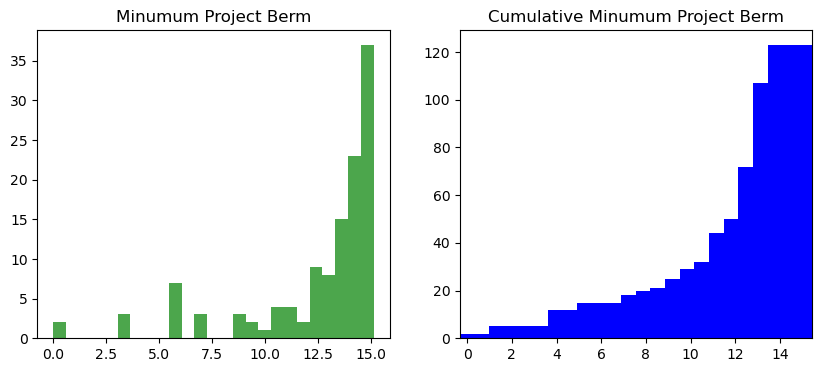

In [22]:
samples = risk['projects_minimum_berm']
res = stats.cumfreq(samples,
                    numbins=25)
 
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size,
                                 res.cumcount.size)
 
# specifying figure size
fig = plt.figure(figsize=(10, 4))
 
# adding sub plots
ax1 = fig.add_subplot(1, 2, 1)
 
# adding sub plots
ax2 = fig.add_subplot(1, 2, 2)
 
# getting histogram using hist function
ax1.hist(samples, bins=25,
         color="green", alpha=0.7)
 
# setting up the title
ax1.set_title('Minumum Project Berm')
 
# cumulative graph
ax2.bar(x, res.cumcount, width=4, color="blue", alpha=1)

# setting up the title
ax2.set_title('Cumulative Minumum Project Berm')
 
ax2.set_xlim([x.min(), x.max()])
 
# display the figure(histogram)
plt.show()


Berm of size 15.0 would hold up to 95% of planar ruptures


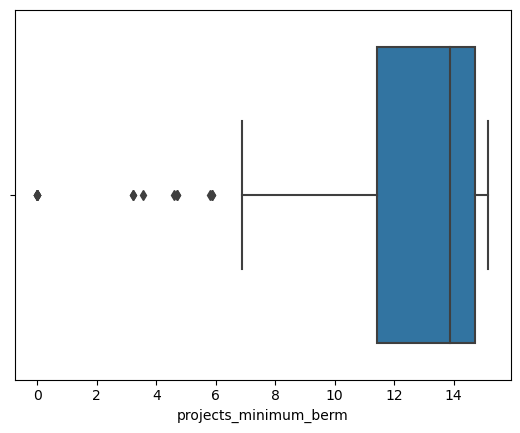

In [23]:
import seaborn as sns
samples=risk["projects_minimum_berm"]
sns.boxplot(x=samples)
print('')
print(f'Berm of size {np.round(samples.quantile([0.95]).item(),2)} would hold up to 95% of planar ruptures')

In [24]:
risk[risk.projects_minimum_berm > 10]

,dipdir,dip,litho,structure,friction,persistency,spacing,paralellism,dip_paralellism,planar_rupture,...,backbreak,cutting_area,blistered_area,area_between_slope_and_rupture_projection,distance_between_slopefoot_and_rupture_projection,distance_between_projection_rupture_and_broken_material,required_containment_width,remanescent_width_superior_berm,effective_slope_angle,projects_minimum_berm
0,238,48,Quartzite,Sb,35,20,1.0,True,True,True,...,4.694454,34.108712,47.752197,0.261251,0.355805,7.079980,7.435785,3.005546,0.020047,12.130239
1,248,43,Itabirite,Sb,37,20,1.0,True,True,True,...,6.297409,40.056447,56.079026,1.995198,1.217165,6.203532,7.420697,1.402591,0.017978,13.718106
4,240,41,Quartzite,Sb,35,20,1.0,True,True,True,...,7.243285,45.779684,64.091558,2.425083,1.443754,5.853151,7.296905,0.456715,0.016946,14.540190
5,240,40,Itabirite,Sb,37,20,1.0,True,True,True,...,7.615886,47.201664,66.082330,2.993336,1.660925,5.461481,7.122406,0.084114,0.016571,14.738292
9,227,39,Itabirite,Sb,37,20,1.0,True,True,True,...,8.240428,51.634834,72.288768,2.965494,1.710242,5.176250,6.886492,Backbreak > Lo,0.015979,15.126919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,197,43,Schist,Sn,30,20,0.1,True,True,True,...,6.442905,41.928763,58.700268,1.653485,1.108043,6.371195,7.479238,1.257095,0.017811,13.922143
191,193,49,Schist,Sn,30,20,0.1,True,True,True,...,4.178736,29.906911,41.869676,0.311250,0.369185,6.815482,7.184667,3.521264,0.020817,11.363403
193,200,40,Schist,Sn,30,20,0.1,True,True,True,...,7.615886,47.201664,66.082330,2.993336,1.660925,5.461481,7.122406,0.084114,0.016571,14.738292
195,221,47,Schist,Sn,30,20,0.1,True,True,True,...,5.195022,37.993986,53.191581,0.251047,0.365711,7.244180,7.609891,2.504978,0.019351,12.804913


In [25]:
risk[risk.projects_minimum_berm > 10].loc[:,[	'dipdir','dip','litho','structure']].describe()

,dipdir,dip
count,113.000000,113.000000
mean,234.212389,42.230088
std,10.918081,4.360965
min,193.000000,35.000000
25%,229.000000,39.000000
50%,237.000000,41.000000
75%,242.000000,45.000000
max,249.000000,52.000000


In [26]:
mode(risk[risk.projects_minimum_berm > 10].dipdir), mode(risk[risk.projects_minimum_berm > 10].dip)

(ModeResult(mode=array([237]), count=array([8])),
 ModeResult(mode=array([40]), count=array([16])))

In [27]:
slope_dipdir, slope_dip

(220, 60)

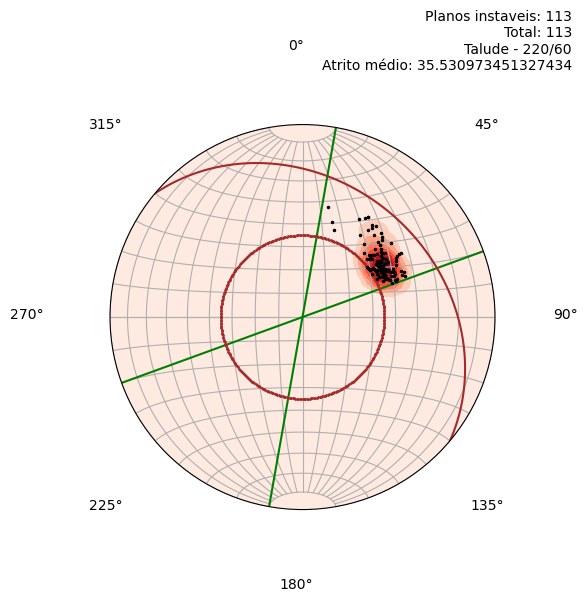

In [28]:
planar_stereogram(risk[risk.projects_minimum_berm > 10],slope_dipdir, slope_dip )